In [72]:
import numpy as np
import math as mt
import pandas as pd
from scipy import stats
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

df = pd.read_csv('C:/Users/Jeremy/Desktop/UT Data Analytics Course/5/C5T1/default of credit card clients.csv', index_col = 0, header = 1)

df = df.rename(columns={'PAY_0': 'pay_stat_sep', 'PAY_2': 'pay_stat_aug', 'PAY_3': 'pay_stat_jul', 'PAY_4': 'pay_stat_jun', 'PAY_5': 'pay_stat_may', 'PAY_6': 'pay_stat_apr'})
df = df.rename(columns={'BILL_AMT1':'bill_amt_sep', 'BILL_AMT2': 'bill_amt_aug', 'BILL_AMT3':'bill_amt_jul', 'BILL_AMT4':'bill_amt_jun', 'BILL_AMT5':'bill_amt_may', 'BILL_AMT6':'bill_amt_apr'})
df = df.rename(columns={'PAY_AMT1':'pay_amt_sep', 'PAY_AMT2':'pay_amt_aug','PAY_AMT3':'pay_amt_jul', 'PAY_AMT4':'pay_amt_jun', 'PAY_AMT5':'pay_amt_may', 'PAY_AMT6':'pay_amt_apr'})

df.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_stat_sep',
       'pay_stat_aug', 'pay_stat_jul', 'pay_stat_jun', 'pay_stat_may',
       'pay_stat_apr', 'bill_amt_sep', 'bill_amt_aug', 'bill_amt_jul',
       'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr', 'pay_amt_sep',
       'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may',
       'pay_amt_apr', 'default payment next month'],
      dtype='object')

In [73]:
df.isnull().values.any()

False

In [74]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,pay_stat_sep,pay_stat_aug,pay_stat_jul,pay_stat_jun,pay_stat_may,pay_stat_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
pay_stat_sep                  30000 non-null int64
pay_stat_aug                  30000 non-null int64
pay_stat_jul                  30000 non-null int64
pay_stat_jun                  30000 non-null int64
pay_stat_may                  30000 non-null int64
pay_stat_apr                  30000 non-null int64
bill_amt_sep                  30000 non-null int64
bill_amt_aug                  30000 non-null int64
bill_amt_jul                  30000 non-null int64
bill_amt_jun                  30000 non-null int64
bill_amt_may                  30000 non-null int64
bill_amt_apr                  30000 non-null int64
pay_amt_sep             

In [76]:
df_sex = df.groupby('SEX')['SEX'].count()
df_sex=df_sex.rename(index={1:'male', 2:'female'})
df_sex

SEX
male      11888
female    18112
Name: SEX, dtype: int64

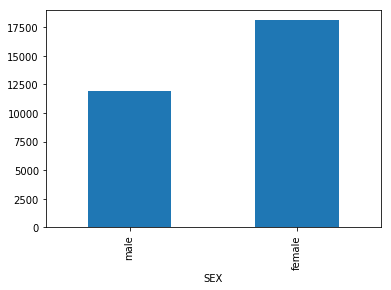

In [77]:
df_sex.plot.bar()

In [78]:
df_edu = df.groupby('EDUCATION')['EDUCATION'].count()
df_edu=df_edu.rename(index={1:'grad school', 2:'university', 3:'high school'})
df_edu

EDUCATION
0                 14
grad school    10585
university     14030
high school     4917
4                123
5                280
6                 51
Name: EDUCATION, dtype: int64

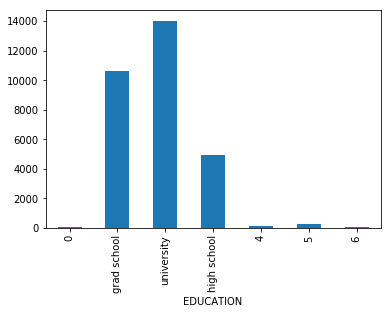

In [79]:
df_edu.plot.bar()

In [80]:
df.loc[df['EDUCATION'] > 3, 'EDUCATION'] = 0

In [81]:
df_mar = df.groupby('MARRIAGE')['MARRIAGE'].count()
df_mar =df_mar.rename(index={1:'married', 2:'single', 3:'divorce', 0:'other'})
df_mar

MARRIAGE
other         54
married    13659
single     15964
divorce      323
Name: MARRIAGE, dtype: int64

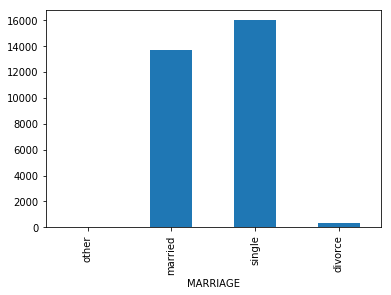

In [82]:
df_mar.plot.bar()

In [83]:
df_default = df.groupby('default payment next month')['default payment next month'].count()
df_default = df_default.rename(index={0:'No Default', 1:'Default'})
df_default

default payment next month
No Default    23364
Default        6636
Name: default payment next month, dtype: int64

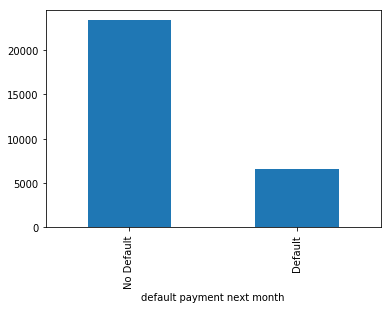

In [84]:
df_default.plot.bar()

(array([1.2498e+04, 7.8800e+03, 5.0590e+03, 2.7590e+03, 1.5980e+03,
        1.2700e+02, 5.6000e+01, 2.2000e+01, 0.0000e+00, 1.0000e+00]),
 array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
         604000.,  703000.,  802000.,  901000., 1000000.]),
 <a list of 10 Patch objects>)

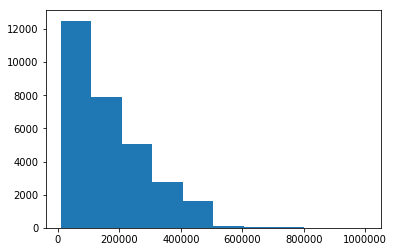

In [85]:
plt.hist(df['LIMIT_BAL'])

(array([6.270e+02, 9.310e+02, 1.127e+03, 1.186e+03, 1.256e+03, 1.477e+03,
        3.014e+03, 1.395e+03, 1.217e+03, 1.158e+03, 1.146e+03, 1.162e+03,
        2.221e+03, 1.041e+03, 9.440e+02, 9.540e+02, 8.700e+02, 8.240e+02,
        1.464e+03, 7.000e+02, 6.170e+02, 5.700e+02, 5.010e+02, 4.660e+02,
        4.520e+02, 7.510e+02, 3.040e+02, 3.250e+02, 2.470e+02, 2.090e+02,
        1.780e+02, 2.440e+02, 8.300e+01, 6.700e+01, 5.600e+01, 4.400e+01,
        3.100e+01, 5.500e+01, 2.500e+01, 1.600e+01, 5.000e+00, 1.500e+01,
        1.000e+01, 6.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([21.  , 22.16, 23.32, 24.48, 25.64, 26.8 , 27.96, 29.12, 30.28,
        31.44, 32.6 , 33.76, 34.92, 36.08, 37.24, 38.4 , 39.56, 40.72,
        41.88, 43.04, 44.2 , 45.36, 46.52, 47.68, 48.84, 50.  , 51.16,
        52.32, 53.48, 54.64, 55.8 , 56.96, 58.12, 59.28, 60.44, 61.6 ,
        62.76, 63.92, 65.08, 66.24, 67.4 , 68.56, 69.72, 70.88, 72.04,
        73.2 , 74.36,

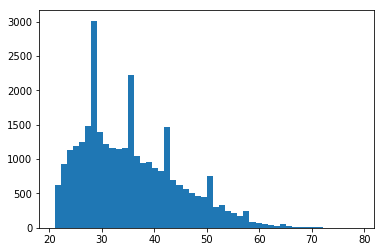

In [86]:
plt.hist(df['AGE'], bins=50)

Text(0.5, 1.0, 'Distribution of Ages')

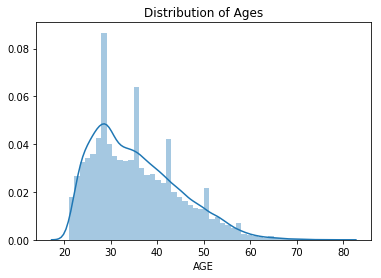

In [87]:
age_dist = sns.distplot(df['AGE'])
age_dist.set_title('Distribution of Ages')

In [88]:
defaulted = df[df['default payment next month']==1]

In [89]:
defaulted.pivot_table('default payment next month', 'SEX', 'EDUCATION', aggfunc=len, margins=True)

EDUCATION,0,1,2,3,All
SEX,,,,,
1,14,906,1408,545,2873
2,19,1130,1922,692,3763
All,33,2036,3330,1237,6636


Text(0.5, 1.0, 'Distribution of Ages of Defaulted')

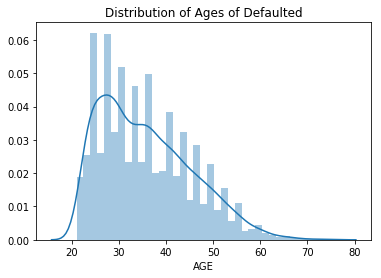

In [90]:
age_dist_defaulted = sns.distplot(defaulted['AGE'])
age_dist_defaulted.set_title('Distribution of Ages of Defaulted')

Text(0.5, 1.0, 'Distribution of Credit Limit of Defaulted')

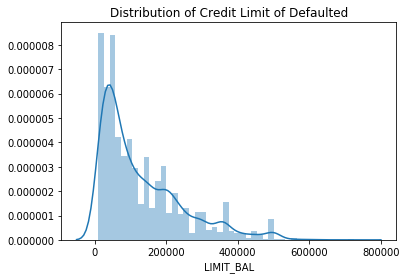

In [91]:
limit_dist_defaulted = sns.distplot(defaulted['LIMIT_BAL'])
limit_dist_defaulted.set_title('Distribution of Credit Limit of Defaulted')

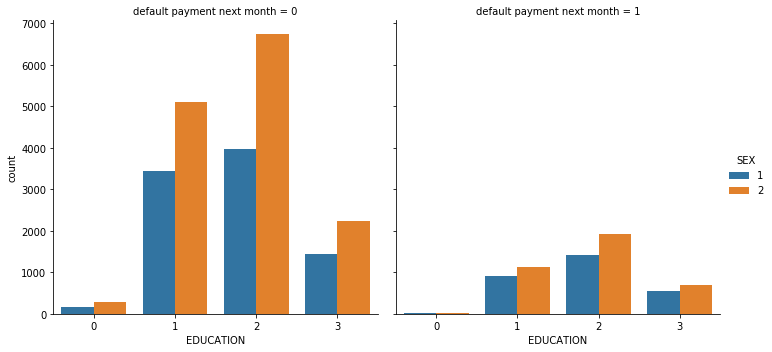

In [92]:
sns.catplot('EDUCATION', data=df, kind='count', hue='SEX', col='default payment next month')

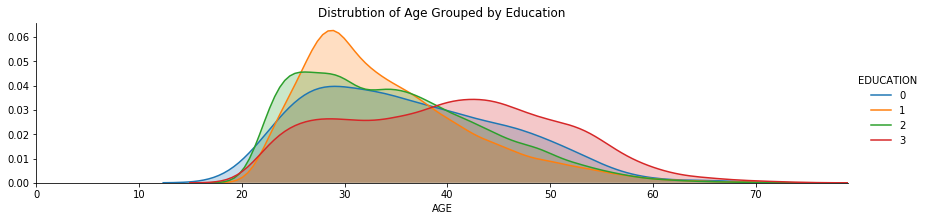

In [93]:
fig = sns.FacetGrid(df, hue='EDUCATION', aspect = 4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = df['AGE'].max()
fig.set(xlim=(0, oldest))
fig.set(title='Distrubtion of Age Grouped by Education')
fig.add_legend()

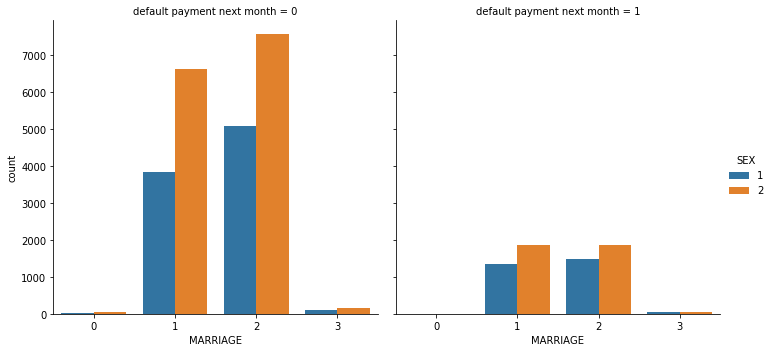

In [94]:
sns.catplot('MARRIAGE', data=df, kind='count', hue='SEX', col='default payment next month')

In [95]:
df_prefactor = df.loc[:, :'AGE']
df_prefactor['default payment next month'] = df.loc[:,'default payment next month']
corrMat = df_prefactor.corr()
corrMat


C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.245297,-0.108139,0.144713,-0.153520
SEX,0.024755,1.000000,0.008144,-0.031389,-0.090874,-0.039961
EDUCATION,-0.245297,0.008144,1.000000,-0.146705,0.180332,0.065685
MARRIAGE,-0.108139,-0.031389,-0.146705,1.000000,-0.414170,-0.024339
AGE,0.144713,-0.090874,0.180332,-0.414170,1.000000,0.013890
default payment next month,-0.153520,-0.039961,0.065685,-0.024339,0.013890,1.000000


In [96]:
covMat = df_prefactor.cov()
covMat

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
LIMIT_BAL,1.683446e+10,1571.050630,-23185.367949,-7323.669658,173076.722569,-8267.551759
SEX,1.571051e+03,0.239247,0.002902,-0.008014,-0.409726,-0.008113
EDUCATION,-2.318537e+04,0.002902,0.530692,-0.055784,1.210948,0.019861
MARRIAGE,-7.323670e+03,-0.008014,-0.055784,0.272452,-1.992764,-0.005273
AGE,1.730767e+05,-0.409726,1.210948,-1.992764,84.969755,0.053143
default payment next month,-8.267552e+03,-0.008113,0.019861,-0.005273,0.053143,0.172276


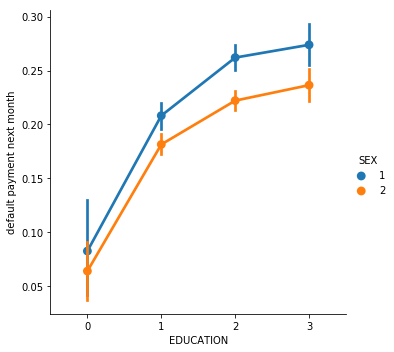

In [97]:
sns.catplot('EDUCATION','default payment next month', hue='SEX', kind = 'point', data=df)

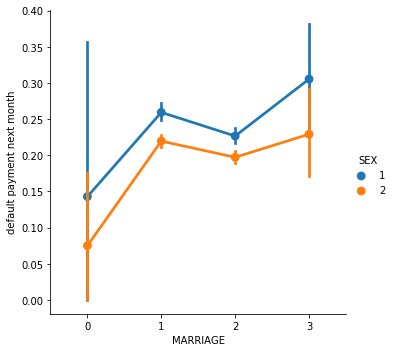

In [98]:
sns.catplot('MARRIAGE','default payment next month', hue='SEX', kind = 'point', data=df)

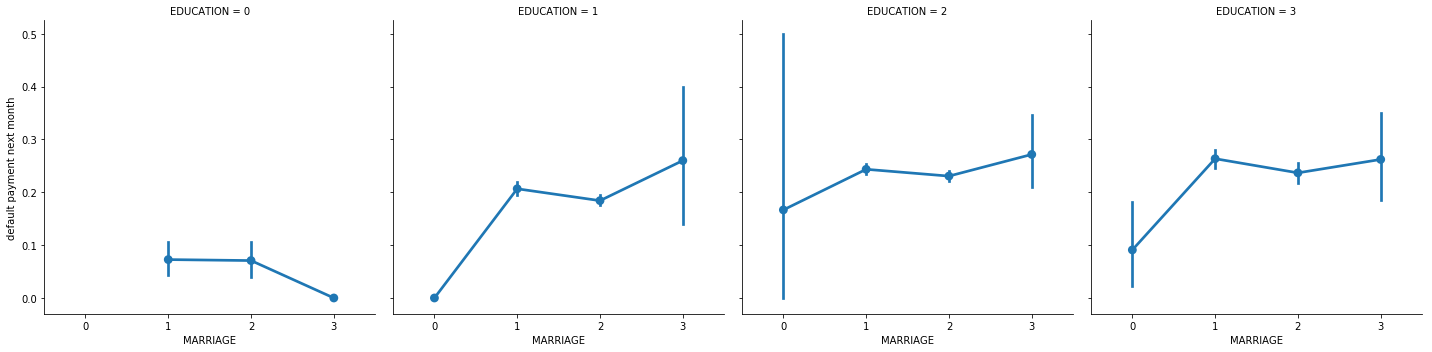

In [116]:
sns.catplot('MARRIAGE','default payment next month', kind = 'point', data=df, col='EDUCATION', col_order=[0, 1,2,3])

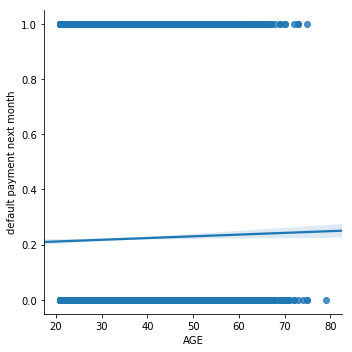

In [100]:
sns.lmplot('AGE', 'default payment next month', data=df)

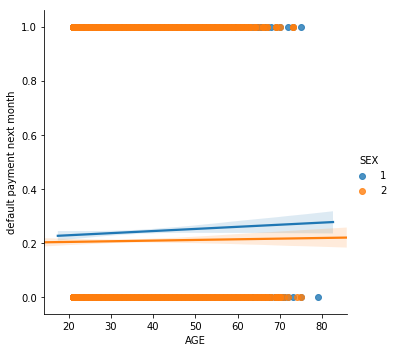

In [101]:
sns.lmplot('AGE', 'default payment next month', data=df, hue='SEX')

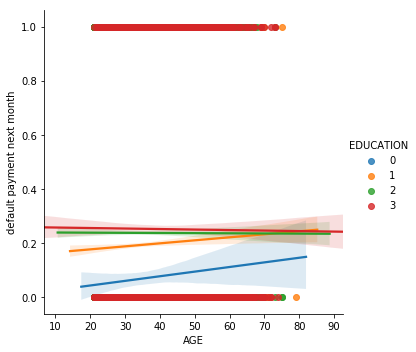

In [102]:
sns.lmplot('AGE', 'default payment next month', data=df, hue='EDUCATION')

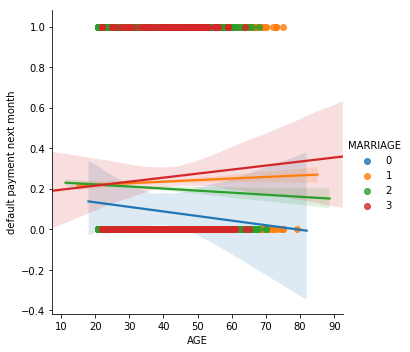

In [103]:
sns.lmplot('AGE', 'default payment next month', data=df, hue='MARRIAGE')

C:\Users\Jeremy\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


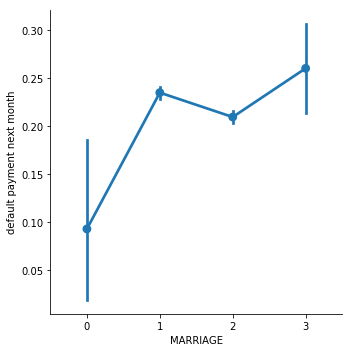

In [108]:
sns.factorplot('MARRIAGE', 'default payment next month', data=df)